In [4]:
# importing the required libraries
import struct
import numpy as np
from sklearn import svm, metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import gzip

def training_images():
    with gzip.open('data/train-images-idx3-ubyte.gz', 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of images
        image_count = int.from_bytes(f.read(4), 'big')
        # third 4 bytes is the row count
        row_count = int.from_bytes(f.read(4), 'big')
        # fourth 4 bytes is the column count
        column_count = int.from_bytes(f.read(4), 'big')
        # rest is the image pixel data, each pixel is stored as an unsigned byte
        # pixel values are 0 to 255
        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8)\
            .reshape((image_count, row_count, column_count))
        return images


def training_labels():
    with gzip.open('data/train-labels-idx1-ubyte.gz', 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of labels
        label_count = int.from_bytes(f.read(4), 'big')
        # rest is the label data, each label is stored as unsigned byte
        # label values are 0 to 9
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        return labels

In [6]:
raw_train_images = training_images()
raw_train_labels = training_labels()

In [7]:
raw_train_images.shape

(60000, 28, 28)

In [8]:
train_images = np.reshape(raw_train_images,(60000,28*28))

In [9]:
train_images.shape

(60000, 784)

In [10]:
raw_train_images = raw_train_images

In [11]:
print(raw_train_images[199])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  12  23  23  28 133 133 229 230 133 133
   75   8   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 157 253 253 253 253 253 253 25

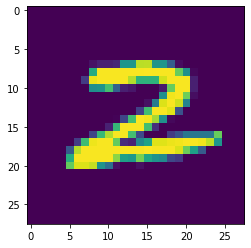

In [12]:
plt.imshow(raw_train_images[199])

In [13]:
raw_train_labels.shape

(60000,)

# Linear Model

In [14]:
clf = svm.SVC(kernel="linear")

In [ ]:
clf.fit(train_images,raw_train_labels)

In [ ]:
def test_images():
    with gzip.open('data/t10k-images-idx3-ubyte.gz', 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of images
        image_count = int.from_bytes(f.read(4), 'big')
        # third 4 bytes is the row count
        row_count = int.from_bytes(f.read(4), 'big')
        # fourth 4 bytes is the column count
        column_count = int.from_bytes(f.read(4), 'big')
        # rest is the image pixel data, each pixel is stored as an unsigned byte
        # pixel values are 0 to 255
        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8)\
            .reshape((image_count, row_count, column_count))
        return images


def test_labels():
    with gzip.open('data/t10k-labels-idx1-ubyte.gz', 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of labels
        label_count = int.from_bytes(f.read(4), 'big')
        # rest is the label data, each label is stored as unsigned byte
        # label values are 0 to 9
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        return labels

In [ ]:
raw_test_images = test_images()
y_true = test_labels()

In [ ]:
test_images = np.reshape(raw_test_images,(10000,28*28))

In [ ]:
y_pred = clf.predict(test_images)

In [ ]:
from sklearn.metrics import plot_confusion_matrix

In [ ]:
plot_confusion_matrix(clf,test_images,y_true)

In [ ]:
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true,y_pred)

# RBF Model 

In [ ]:
clf2_rbf = svm.SVC(kernel = "rbf")
clf2_rbf.fit(train_images,raw_train_labels)
y_pred2 = clf2_rbf.predict(test_images)
plot_confusion_matrix(clf2_rbf,test_images,y_true)
accuracy_score(y_true,y_pred2)

# Polynomial Model


In [ ]:
clf3_poly = svm.SVC(kernel = "poly")
clf3_poly.fit(train_images,raw_train_labels)
y_pred3 = clf3_poly.predict(test_images)
plot_confusion_matrix(clf3_poly,test_images,y_true)
accuracy_score(y_true,y_pred3)

# Best Model Polynomial kernel 